In [43]:
import pandas as pd
df=pd.read_csv("Life Expectancy Data.csv")
df

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0,263.0,62,0.01,71.279624,65.0,1154,...,6.0,8.16,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1
1,Afghanistan,2014,Developing,59.9,271.0,64,0.01,73.523582,62.0,492,...,58.0,8.18,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0
2,Afghanistan,2013,Developing,59.9,268.0,66,0.01,73.219243,64.0,430,...,62.0,8.13,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9
3,Afghanistan,2012,Developing,59.5,272.0,69,0.01,78.184215,67.0,2787,...,67.0,8.52,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8
4,Afghanistan,2011,Developing,59.2,275.0,71,0.01,7.097109,68.0,3013,...,68.0,7.87,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2933,Zimbabwe,2004,Developing,44.3,723.0,27,4.36,0.000000,68.0,31,...,67.0,7.13,65.0,33.6,454.366654,12777511.0,9.4,9.4,0.407,9.2
2934,Zimbabwe,2003,Developing,44.5,715.0,26,4.06,0.000000,7.0,998,...,7.0,6.52,68.0,36.7,453.351155,12633897.0,9.8,9.9,0.418,9.5
2935,Zimbabwe,2002,Developing,44.8,73.0,25,4.43,0.000000,73.0,304,...,73.0,6.53,71.0,39.8,57.348340,125525.0,1.2,1.3,0.427,10.0
2936,Zimbabwe,2001,Developing,45.3,686.0,25,1.72,0.000000,76.0,529,...,76.0,6.16,75.0,42.1,548.587312,12366165.0,1.6,1.7,0.427,9.8


In [44]:
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [45]:
#as 10 life-expectancy values are missing,those corresponding rows are dropped
df = df.dropna(subset=['Life expectancy '])
df.isnull().sum()

Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [46]:
df.groupby('Country').apply(lambda x:x["Hepatitis B"].interpolate(method='linear', limit_direction='both', axis=0))[55:65]

Country                
Angola               55    69.0
                     56    73.0
                     57    73.0
                     58    73.0
                     59    73.0
                     60    73.0
                     61    73.0
                     62    73.0
                     63    73.0
Antigua and Barbuda  64    99.0
Name: Hepatitis B, dtype: float64

In [47]:
df.loc[:, "Polio"]=df.groupby('Country')["Polio"].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
df.loc[:, "Hepatitis B"]=df.groupby('Country')["Hepatitis B"].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
df.loc[:, "Diphtheria "]=df.groupby('Country')["Diphtheria "].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(ilocs[0], value, pi)


Country                              0
Year                                 0
Status                               0
Life expectancy                      0
Adult Mortality                      0
infant deaths                        0
Alcohol                            193
percentage expenditure               0
Hepatitis B                        144
Measles                              0
 BMI                                32
under-five deaths                    0
Polio                                0
Total expenditure                  226
Diphtheria                           0
 HIV/AIDS                            0
GDP                                443
Population                         644
 thinness  1-19 years               32
 thinness 5-9 years                 32
Income composition of resources    160
Schooling                          160
dtype: int64

In [48]:
for i in df.columns[3:]:
  df.loc[:, i]=df.groupby('Country')[i].transform(lambda x: x.interpolate(method='linear', limit_direction='both', axis=0))
  df[i]=df[i].fillna(0)
df.isnull().sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


Country                            0
Year                               0
Status                             0
Life expectancy                    0
Adult Mortality                    0
infant deaths                      0
Alcohol                            0
percentage expenditure             0
Hepatitis B                        0
Measles                            0
 BMI                               0
under-five deaths                  0
Polio                              0
Total expenditure                  0
Diphtheria                         0
 HIV/AIDS                          0
GDP                                0
Population                         0
 thinness  1-19 years              0
 thinness 5-9 years                0
Income composition of resources    0
Schooling                          0
dtype: int64

In [49]:
no_of_unique_years=pd.value_counts(df.Year)
no_of_unique_countries=pd.value_counts(df.Country)
print("The survey is done over ",len(no_of_unique_years),"years and over ",len(no_of_unique_countries),"countries")
#since its no of years is less=>easier to obtain global trend over a year

The survey is done over  16 years and over  183 countries


[2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015] 16


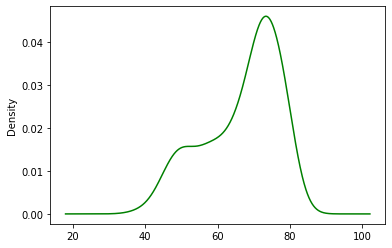

In [50]:
years = df['Year'].unique().tolist()   #find unique values
years.sort()
print(years,len(years))
#Year 2000 Analysis
yr_2000 = df[df['Year']==years[0]]
yr_2000['Life expectancy '].plot.density(color='green')


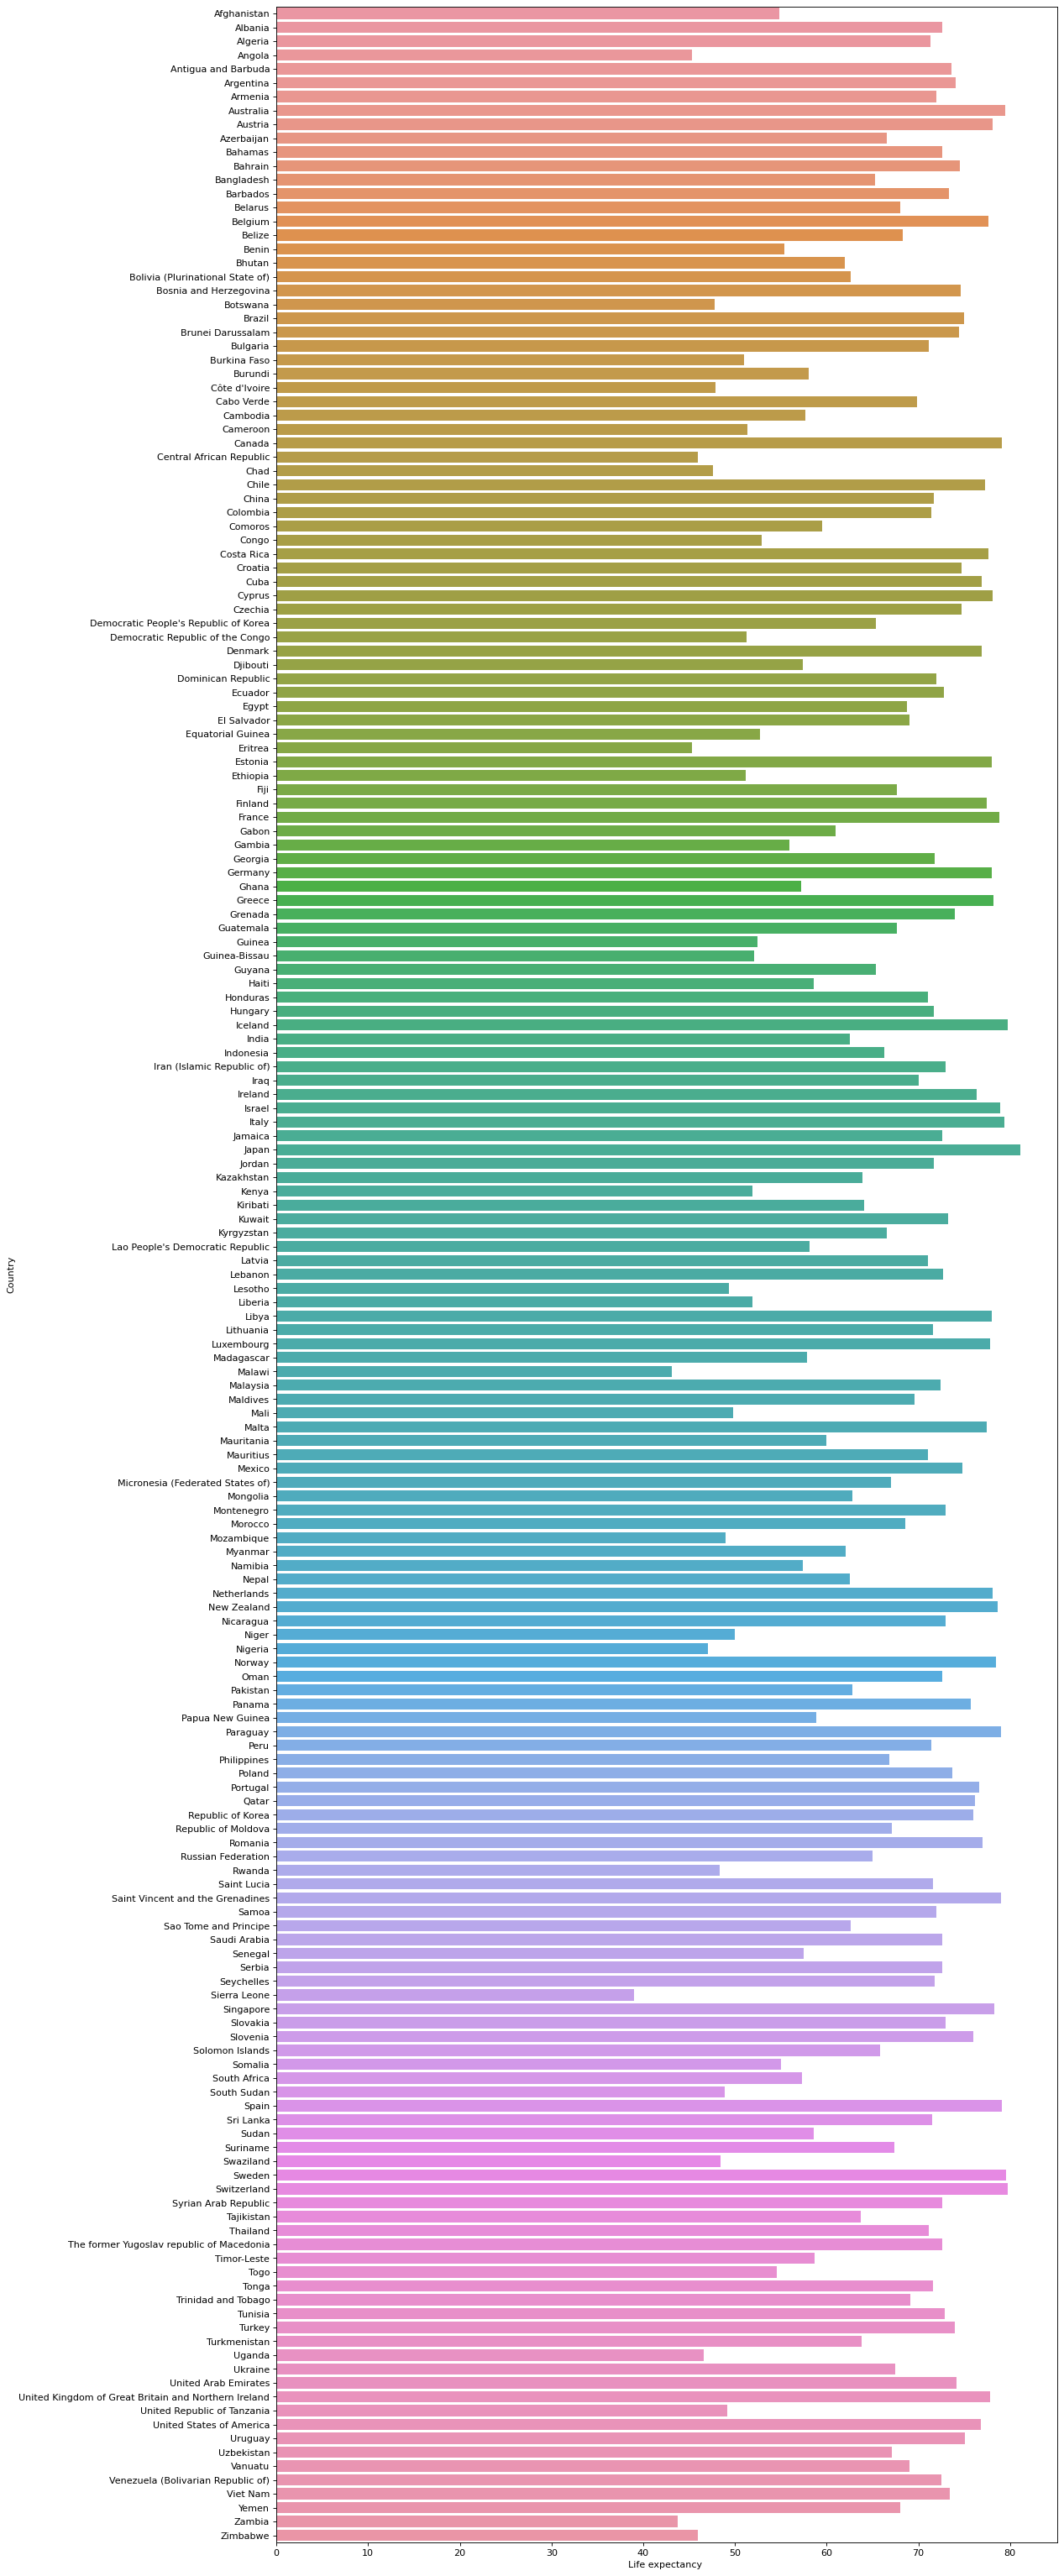

In [51]:
import seaborn as sns
from matplotlib.pyplot import figure
figure(num=None, figsize=(15,50), dpi=80, facecolor='w', edgecolor='r')
sns.barplot(x=yr_2000['Life expectancy '], y =yr_2000['Country'])

In [52]:
yr_2000.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,183.0,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,1.830000e+02,183.000000,183.000000,183.000000,183.000000
mean,2000.0,66.750273,181.475410,37.540984,4.545738,473.850781,57.710383,4663.792350,34.048634,53.726776,75.644809,5.502350,73.098361,2.530055,3979.675562,7.376959e+06,5.091257,5.187432,0.484224,9.938251
std,0.0,10.295528,140.275938,149.285320,3.957076,1256.723594,35.449054,17776.459005,19.080327,209.636215,28.079157,2.194261,29.899854,6.973697,8586.577631,2.359399e+07,4.739816,4.999001,0.300190,4.644714
min,2000.0,39.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000,3.000000,0.100000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,2000.0,58.650000,84.500000,0.000000,1.210000,8.768788,23.000000,0.000000,16.450000,1.000000,63.500000,4.135000,57.500000,0.100000,146.287130,6.382500e+03,1.600000,1.550000,0.302000,7.400000
50%,2000.0,71.000000,155.000000,4.000000,3.520000,35.661251,68.000000,47.000000,37.500000,5.000000,88.000000,5.390000,85.000000,0.100000,555.296942,5.267960e+05,3.400000,3.400000,0.583000,11.200000
75%,2000.0,74.450000,236.500000,27.000000,7.285000,256.925303,90.000000,2426.000000,52.800000,36.500000,96.000000,6.930000,96.000000,1.100000,2226.163240,3.627261e+06,7.750000,7.850000,0.712000,13.050000
max,2000.0,81.100000,665.000000,1800.000000,14.070000,8246.130437,99.000000,212183.000000,67.900000,2500.000000,99.000000,13.700000,99.000000,46.400000,48735.995490,1.752876e+08,27.700000,28.600000,0.911000,20.400000


In [53]:
yr_2000.loc[yr_2000['Life expectancy '].idxmax()]#Country with maximum life expectancy in 2000

Country                                  Japan
Year                                      2000
Status                               Developed
Life expectancy                           81.1
Adult Mortality                           74.0
infant deaths                                4
Alcohol                                   7.97
percentage expenditure             5926.296654
Hepatitis B                                0.0
Measles                                  22497
 BMI                                      22.2
under-five deaths                            5
Polio                                     98.0
Total expenditure                         7.53
Diphtheria                                85.0
 HIV/AIDS                                  0.1
GDP                                  38532.488
Population                            126843.0
 thinness  1-19 years                      1.6
 thinness 5-9 years                        1.4
Income composition of resources          0.852
Schooling    

In [54]:
yr_2000.loc[yr_2000['Life expectancy '].idxmin()]#Country with min life exp: Developing Country

Country                            Sierra Leone
Year                                       2000
Status                               Developing
Life expectancy                            39.0
Adult Mortality                           533.0
infant deaths                                29
Alcohol                                    3.97
percentage expenditure                20.395683
Hepatitis B                                63.0
Measles                                    3575
 BMI                                       17.2
under-five deaths                            48
Polio                                      46.0
Total expenditure                         13.63
Diphtheria                                 44.0
 HIV/AIDS                                   1.2
GDP                                  139.314773
Population                            4564297.0
 thinness  1-19 years                       1.3
 thinness 5-9 years                         1.4
Income composition of resources         

In [55]:
yr_2000.loc[yr_2000['GDP'].idxmax()]#Country with max GDP

Country                             Luxembourg
Year                                      2000
Status                               Developed
Life expectancy                           77.8
Adult Mortality                           98.0
infant deaths                                0
Alcohol                                  13.14
percentage expenditure             8246.130437
Hepatitis B                               77.0
Measles                                      0
 BMI                                      54.0
under-five deaths                            0
Polio                                     99.0
Total expenditure                         7.48
Diphtheria                                99.0
 HIV/AIDS                                  0.1
GDP                                48735.99549
Population                              4363.0
 thinness  1-19 years                      1.0
 thinness 5-9 years                        1.0
Income composition of resources          0.848
Schooling    

In [56]:
yr_2000.loc[yr_2000['GDP'].idxmin()]#Country with min gdp

Country                               Bahamas
Year                                     2000
Status                             Developing
Life expectancy                          72.6
Adult Mortality                         192.0
infant deaths                               0
Alcohol                                 12.15
percentage expenditure                    0.0
Hepatitis B                              21.0
Measles                                     0
 BMI                                     54.4
under-five deaths                           0
Polio                                    91.0
Total expenditure                        5.21
Diphtheria                               99.0
 HIV/AIDS                                 0.1
GDP                                       0.0
Population                                0.0
 thinness  1-19 years                     2.7
 thinness 5-9 years                       2.6
Income composition of resources           0.0
Schooling                         

In [57]:
yr_2000.loc[yr_2000['Income composition of resources'].idxmax()]#Country with max income composition of resources
#Observe that with respect to monetary utilisation- the developed counties tend to have higher life expectancy

Country                                 Norway
Year                                      2000
Status                               Developed
Life expectancy                           78.5
Adult Mortality                           85.0
infant deaths                                0
Alcohol                                   5.67
percentage expenditure             6191.211908
Hepatitis B                                0.0
Measles                                      0
 BMI                                      53.3
under-five deaths                            0
Polio                                     91.0
Total expenditure                         8.27
Diphtheria                                 9.0
 HIV/AIDS                                  0.1
GDP                                38146.71539
Population                            449967.0
 thinness  1-19 years                      0.8
 thinness 5-9 years                        0.7
Income composition of resources          0.911
Schooling    

In [58]:
yr_2000.loc[yr_2000['Income composition of resources'].idxmin()]#Country with min income composition of resources

Country                            Antigua and Barbuda
Year                                              2000
Status                                      Developing
Life expectancy                                   73.6
Adult Mortality                                  156.0
infant deaths                                        0
Alcohol                                           7.27
percentage expenditure                      1127.74347
Hepatitis B                                       96.0
Measles                                              0
 BMI                                              38.2
under-five deaths                                    0
Polio                                             96.0
Total expenditure                                 4.13
Diphtheria                                        95.0
 HIV/AIDS                                          0.1
GDP                                        9875.161736
Population                                         0.0
 thinness 

Status
Developed     AxesSubplot(0.125,0.125;0.775x0.755)
Developing    AxesSubplot(0.125,0.125;0.775x0.755)
Name: Life expectancy , dtype: object

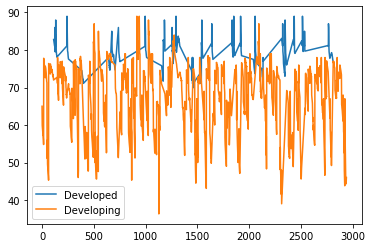

In [59]:
#visualizing life expectancy for developing and developed countries
df.groupby('Status')['Life expectancy '].plot(legend=True)
#life expectancy of developed countries is higher than that of developed countries

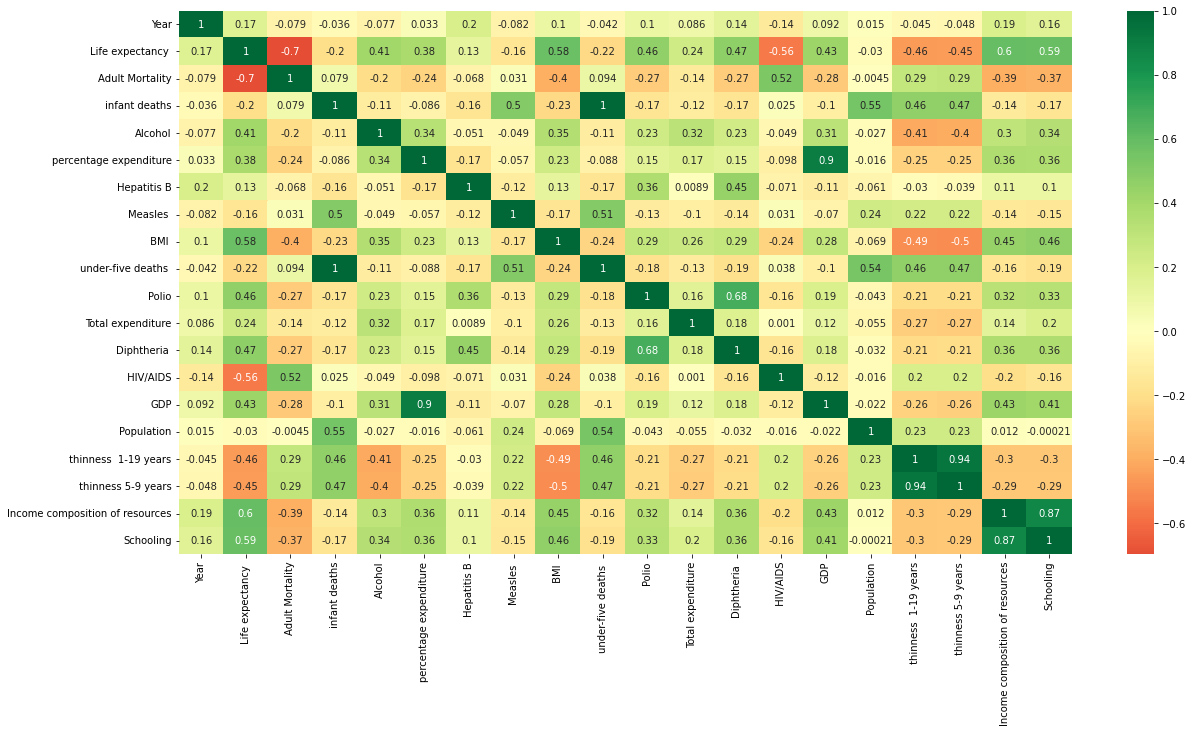

In [60]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True,ax=ax)

#this heat map indicates that infant deaths and under-five deaths are very highly correlated

In [61]:
year_expectancy=df.groupby('Year')['Life expectancy '].mean()

Year
2000    66.750273
2001    67.128962
2002    67.351366
2003    67.433333
2004    67.646448
2005    68.209290
2006    68.667760
2007    69.036066
2008    69.427869
2009    69.938251
2010    70.048634
2011    70.654098
2012    70.916940
2013    71.236066
2014    71.536612
2015    71.616940
Name: Life expectancy , dtype: float64


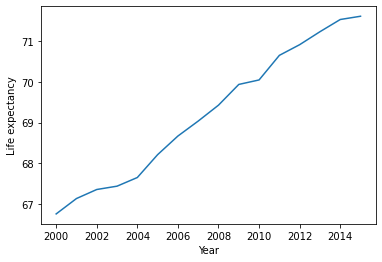

In [63]:
print(year_expectancy)
#year_expectancy.plot.bar()
year_expectancy.plot(ylabel="Life expectancy")
# indicating that life expectancy increasing year by year from 2000 to 2015

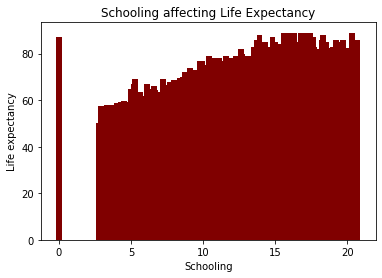

In [64]:
# schooling influences life expectancy,which is indirectly indicating that country's development helps in increasing life expectancy
plt.bar( df['Schooling'],df['Life expectancy '], color ='maroon',width=0.4)
 
plt.xlabel("Schooling")
plt.ylabel("Life expectancy")
plt.title("Schooling affecting Life Expectancy")
plt.show()